# 3 Custom Environments
In this task you are asked to create a environment for a reinforcement agent. It's common to create environments for agents by using the openai gym interface. It creates a good baseline for what is necessary to train a RL agent and makes it easy to try out different environments on the same algorithm.
If you need more information take a look at the documentation https://gym.openai.com/docs/.
You can find the implementation of all official enviroments on GitHub: https://github.com/openai/gym/tree/master/gym/envs if you need some examples. 

In [1]:
pip install gym

In [288]:
import gym
import numpy as np
import time
from IPython.display import display, clear_output
import matplotlib.pyplot as plt


## 3.1 The Environment
A openai gym environment consists of at least 3 methods. `__init__` the constructor which sets all the necessary values, a `step` function, which describes the behaviour of the environment and a `reset` function, which resets the starting state of the environment. In addition to that usually a `render` function is provided to visualize the behaviour of the environment.

#### \__init__:
The Constructor of the environment defines all the necessary variables. To set the bounds of our environment we have to define the action_space and the observartion space. The gym.spaces library contains the necassary functions to do in our case we use gym.spaces.Discrete because we want to only handle discrete values.
The Discrete space works a bit like a range, with some extra methods. A Linear representation of the state is helpful for tabular learning, because it makes creating a Q-Table really easy. 

#### step:
The step method takes an action and returns a tuple of the shape(observation, reward, done). The observation is the result of taking the action. The reward is the reward handet for takin given action in the previous state. The done variable is boolean and indicates if a given scenario has come to an end. 

#### reset:
The reset method resets the start state of the environment. It returns the new state of the environment.

#### render:
The render method visualizes the state of the environment. There are many different ways to do so i.e. creating a visual representation by using vector graphics or printing to the terminal. 
We want to focus on the easiest way, by printing the state. Find a good and easily printable representation of the internal state (i.e. a numpy array) and print it. To print over the last output you can call the  function before you print the state.

### Encoding and decoding
This functions are not necessary for a gym environment. However it might be usefull do write some functions that encode and decode the linearized state to a 2- dimensional Form and back.

#### decode_action
returns the action refering to the index of the action

#### decode_state
returns a 2D representation of the linear state

#### encode_state
returns a linear representation of the 2D state.


### Task 3.1.1
- Create a two dimensional, discrete environment of the size 8x8.
- Each episode the agent should start at a random position, while the target always stays at the same position.
- The agent should be able to move in all 4 directions, If the agent hits a wall it should do nothing.
- An episode ends if the agent reaches the target.
- Reaching the target results in a reward of 1, while every other action should give a small negative reward.

In [280]:
class CustomEnv(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(self):
        super(CustomEnv, self).__init__()
        # Write a constructor for your enviroment
        # Define the action_space and observation_space
        # Position your agent and the target in the enviroment 
        self.action_space = gym.spaces.Discrete(4)

        self.observation_space = gym.spaces.Discrete(64)
        self.env_space = np.zeros((8,8))
        random_index1 = np.random.randint(0, self.env_space.shape[0])
        random_index2 = np.random.randint(0, self.env_space.shape[1])

        self.target_pos = [1,4]
        self.agent_pos = [random_index1, random_index2]
        
    def step(self, action):
        # Write the step method for your enviroment. Make sure your agent does not go out of bounds
        # by performing the action.

        reward = 0
        done = False

        #north
        if action == 0:
            if self.agent_pos[0] != 0:
                self.agent_pos[0] -=1
        #left
        if action == 1:
            if self.agent_pos[1] != 0:
                self.agent_pos[1] -= 1

        #right
        if action == 2:
            if self.agent_pos[1] != 7:
                self.agent_pos[1] += 1

        #south
        if action == 3:
            if self.agent_pos[0] != 7:
                self.agent_pos[0] += 1

        if self.agent_pos == self.target_pos:
            reward += 1
            done = True
        else:
            reward -= .1

        observation = self.agent_pos[0] * 8 + self.agent_pos[1] 
        
        return (observation, reward, done,_)
     
    def reset(self):
        random_index1 = np.random.randint(0, self.env_space.shape[0])
        random_index2 = np.random.randint(0, self.env_space.shape[1])
        self.agent_pos = [random_index1, random_index2]
        state = self.agent_pos[0] * 8 + self.agent_pos[1] 
        # Write the reset method that results in the starting state
        
        return state
        
    def render(self):
        self.env_space *= 0
        self.env_space[self.target_pos[0], self.target_pos[1]] = 1
        self.env_space[self.agent_pos[0], self.agent_pos[1]] = 2
        print(self.env_space)

        print('\nagent: {}\ntarget:{}'.format(2,1))
        #Write a render method for your enviroment to visualize the current state in the terminal

    def decode_action(self, action):
        #decode a linear action to 2D
        #north
        act = ''
        if action == 0:
            act = 'north'
        #left
        if action == 1:
            act = 'left'

        #right
        if action == 2:
            act = 'right'

        #south
        if action == 3:
            act = 'south'
        

        return act

    def decode_state(self, state):
        #decode a linear state to 2D
        return np.reshape(state, 2)
    
    def encode_state(self,state):
        #encode a 2D state in 1D
        return np.reshape(state, 1)
    

## 3.2 Test with a random agent
The following cell allows you to test your enviroment with a random agent.

In [188]:
env = CustomEnv()
done = False
while done == False:
    a = env.action_space.sample()
    _,_, done,_ = env.step(a)
    clear_output(wait=True)
    env.render()
    time.sleep(0.2)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

agent: 2
target:1


## Task 3.3 Test with a Q-Learning Agent
In the previous task we wrote an agent that used the SARSA algorithm. Now we want to use a similar algorithm, Q-Learning, to solve your own custom environment. And of course visualise your training progress (Cumulative rewards over time).

The main difference between SARSA and Q-Learning is the way the Q-Values are calculated. Therefore, you can recycle most of your code.

In [258]:
def evaluate(policy):
    reward = []
  
    # env.step(s)
    for i in range(20):
        s = env.reset()
        # print('state: {}'.format(state))
        done = False
        reward.append([])
        while not done:
            # state = policy(state)
            s, r, done, _ = env.step(policy(s))
            # env.env.s = 
            # s = state[0]
            reward[i].append(r)
            if i == 19:
                nb_render(env)
            # print('reward: {}'.format(reward))
    # print(len(reward))
    cumulative_rewards = [np.sum(reward[i]) for i in range(len(reward))]
    return cumulative_rewards

In [189]:
def init_table():
    return np.zeros((int(env.observation_space.n),int(env.action_space.n)))

In [190]:
def exploit(state):
    s = state
    best_action_index = np.argmax(q_table[state])
    return best_action_index

In [191]:
def explore(state):
    rand_action_index = np.random.randint(0,q_table[state].size)
    return rand_action_index

In [192]:
epsilon = 0.1

def eps_greedy(state):
    rand = np.random.random()
    if rand < epsilon:
        return explore(state)
    return exploit(state)

In [243]:
gamma = 0.99

def td_error(s, a, r, s_prime, a_prime):
    q_sa = q_table[s,a]
    q_sa_prime = np.max(q_table[s_prime])
    return r + gamma * q_sa_prime - q_sa

In [244]:
eta = 0.1

def update_table(s, a, delta):
    q_table[s, a] += eta * delta

In [284]:
episodes = 2000

def train():
    global q_table 
    q_table = init_table()
    reward = []
    for i in range(episodes):
        s = env.reset()
        reward.append([])
        done = False
        r_total = 0
        delta = 0
        while not done:
            a = eps_greedy(s)
            s_prime, r, done, _ = env.step(a)
            # r_total += r
            reward[i].append(r)
            a_prime = exploit(s)
            # s_prime, _, _, _ = env.step(a_prime)

            delta = td_error(s, a, r, s_prime, a_prime)

            update_table(s, a, delta)
            s = s_prime
            # env.env.s = s_prime
    cumulative_rewards = [np.sum(reward[i]) for i in range(len(reward))]   
    return cumulative_rewards

In [285]:
env = CustomEnv()
cumulative_rewards = train()

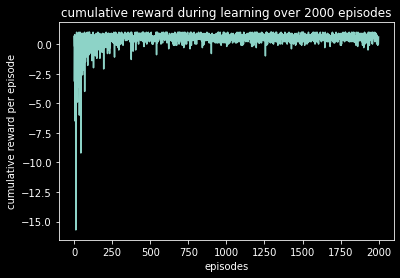

In [290]:
plt.style.use('dark_background')
plt.title('cumulative reward during learning over 2000 episodes')
plt.xlabel('episodes')
plt.ylabel('cumulative reward per episode')
plt.plot(cumulative_rewards)

### Task 3.3.1 Size concerns for Tabular RL:
The table for learning our simple enviroment has the size 64x4 for now. Since we have 64 possible States and 4 actions. How much bigger would the table get if we allowed the target to be placed anywhere?  

In [286]:
# the table would be 64 times as big as it is now so: 16384 entries
print(64 * 64 * 4)

16384


In [279]:
s = env.reset()
reward = []
done = False
while not done:
    s, r, done, _ = env.step(np.argmax(q_table[s]))
    reward.append(r)
    clear_output(wait=True)
    env.render()
    time.sleep(.5)

print('reward: {}'.format(np.sum(reward)))

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

agent: 2
target:1
reward: 0.94
